<a href="https://colab.research.google.com/github/saadghojaria55/knn-svm/blob/main/SVMvsKNN_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SVM-KNN: Discriminative Nearest Neighbor Classification for Voice Recognition of Gender

<h1>About Data : </h1>
<p>Voice Gender - Gender Recognition by Voice and Speech Analysis</p>

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).<br>

The following acoustic properties of each voice are measured and included within the CSV:

meanfreq: mean frequency (in kHz) <br>
sd: standard deviation of frequency  <br>
median: median frequency (in kHz) <br>
Q25: first quantile (in kHz) <br>
Q75: third quantile (in kHz) <br>
IQR: interquantile range (in kHz) <br>
skew: skewness (see note in specprop description)  <br>
kurt: kurtosis (see note in specprop description) <br>
sp.ent: spectral entropy <br>
sfm: spectral flatness <br>
mode: mode frequency <br>
centroid: frequency centroid (see specprop) <br>
peakf: peak frequency (frequency with highest energy) <br>
meanfun: average of fundamental frequency measured across acoustic signal <br>
minfun: minimum fundamental frequency measured across acoustic signal <br>
maxfun: maximum fundamental frequency measured across acoustic signal <br>
meandom: average of dominant frequency measured across acoustic signal <br>
mindom: minimum of dominant frequency measured across acoustic signal <br>
maxdom: maximum of dominant frequency measured across acoustic signal <br>
dfrange: range of dominant frequency measured across acoustic signal <br>
modindx: modulation index. Calculated as the accumulated absolute difference  between adjacent measurements of fundamental frequencies divided by the frequency range <br>
label: male or female <br>

The best model achieves 99% accuracy on the test set. According to a CART model, it appears that looking at the mean fundamental frequency might be enough to accurately classify a voice. However, some male voices use a higher frequency, even though their resonance differs from female voices, and may be incorrectly classified as female. To the human ear, there is apparently more than simple frequency, that determines a voice's gender.
<br>
To analyze gender by voice and speech, a training database was required. A database was built using thousands of samples of male and female voices, each labeled by their gender of male or female. Voice samples were collected from the following resources:<br>

The Harvard-Haskins Database of Regularly-Timed Speech Telecommunications & Signal Processing Laboratory (TSP) Speech Database at McGill University VoxForge Speech Corpus Festvox CMU_ARCTIC Speech Database at Carnegie Mellon University Each voice sample is stored as a.WAV file, which is then pre-processed for acoustic analysis using the specan function from the WarbleR R package. Specan measures 22 acoustic parameters on acoustic signals for which the start and end times are provided.<br>

The output from the pre-processed WAV files were saved into a CSV file, containing 3168 rows and 21 columns (20 columns for each feature and one label column for the classification of male or female). You can download the pre-processed dataset in CSV format, using the link above.In order to analyze gender by voice and speech, a training database was required. A database was built using thousands of samples of male and female voices, each labeled by their gender of male or female.<br>
<img src="http://i.imgur.com/Npr2U7O.png"><br>
Mean fundamental frequency appears to be an indicator of voice gender, with a threshold of 140hz separating male from female classifications.

## KNN 
---

---
> Support Vector Machines (SVM) and k-Nearest Neighbor (kNN) are two
common machine learning algorithms. Used for classifying images, the kNN and SVM each have strengths and weaknesses. When classifying an image, the SVM creates a hyperplane, dividing the input space between classes and classifying based upon which side of the hyperplane an unclassified object lands when placed in the input space. The kNN uses a system of voting to determine which class an unclassified object belongs to, considering the class of the nearest neighbors in the decision space. The SVM is extremely fast, classifying 12 megapixel aerial images in roughly ten seconds as opposed
to the kNN which takes anywhere from forty to fifty seconds to classify the same image.When classifying, the kNN will generally classify accurately; however, it generates several small misclassifications that interfere with final classified image that is outputted.In comparison, the SVM will occasionally misclassify a large object that rarely interferes
with the final classified image. While both algorithms yield positive results regarding the accuracy in which they classify the images, the SVM provides significantly better classification accuracy and classification speed than the kNN.





In [1]:
import csv
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
url='/content/drive/MyDrive/voice.csv'
data=pd.read_csv(url)

In [25]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [27]:
print("Size of Gender Recognition dataset       : {}".format(data.shape))

Size of Gender Recognition dataset       : (3168, 21)


In [28]:
data.isna().sum()                        # Printing a count of missing value w.r.t each feature in full_df

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


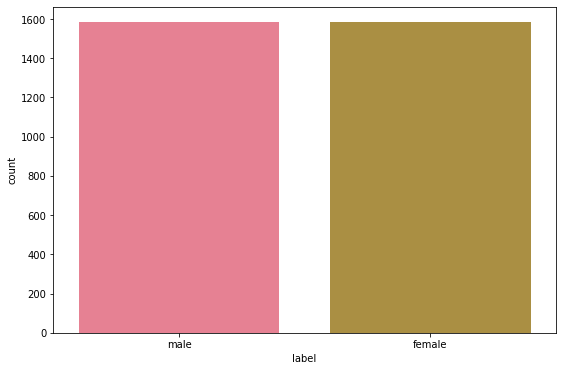

In [30]:
plt.figure(figsize=(9,6))
sns.countplot(x='label', data=data, order=["male", "female"] )

In [31]:
data['label'].value_counts()           # Prints the count of different classes in 'label'

male      1584
female    1584
Name: label, dtype: int64

In [32]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [33]:
data.label = [1 if each == "male" else 0 for each in data.label]

In [34]:
corr=data.corr()

In [35]:
corr.style.background_gradient(cmap='coolwarm')

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


Filtering Correlation of columns greater than 0.9 

Text(0, 0.5, 'Features')

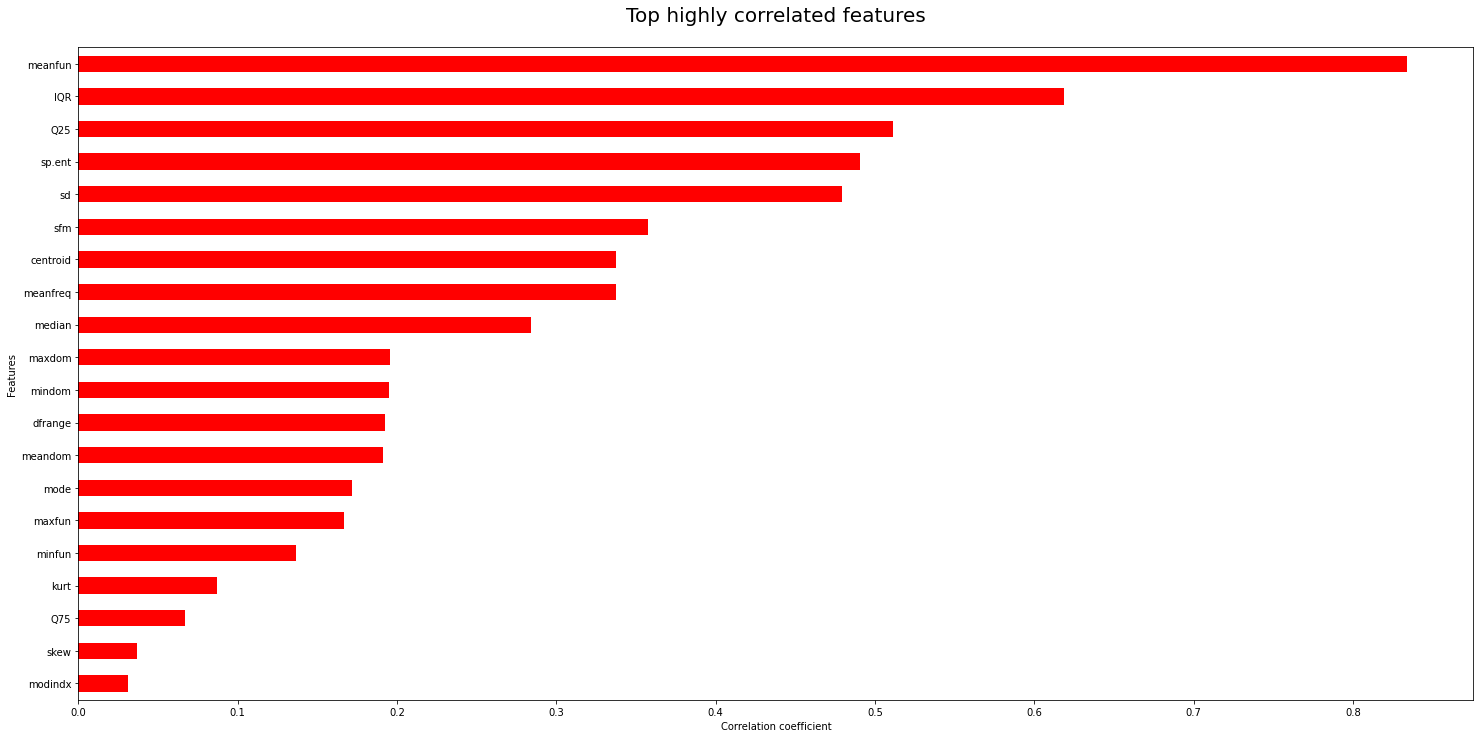

In [36]:
selected_pixel_features = corr['label'].apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:21][::-1]
plt.figure(figsize=(25,12))
selected_pixel_features.plot(kind='barh',color='red')
# calculating highest correlated faetures
# with respect to target variable i.e. "convert"
plt.title("Top highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

In [37]:
corr = corr[corr >= 0.9]
corr.describe()
corr.style.background_gradient(cmap='coolwarm')

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,nan,0.925445,0.911416,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
sd,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
median,0.925445,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.925445,nan,nan,nan,nan,nan,nan,nan,nan,nan
Q25,0.911416,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,0.911416,nan,nan,nan,nan,nan,nan,nan,nan,nan
Q75,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
IQR,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
skew,nan,nan,nan,nan,nan,nan,1.000000,0.977020,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
kurt,nan,nan,nan,nan,nan,nan,0.977020,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sp.ent,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sfm,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [38]:
gender = data.label
data.drop(["label"], axis = 1, inplace = True)

In [39]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [40]:
data = (data-np.min(data))/(np.max(data)-np.min(data))

In [41]:
features = data

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, gender, test_size = 0.2, random_state = 42)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
K = 1 # K nearest neighbors
knn = KNeighborsClassifier(n_neighbors = K)

In [45]:
knn.fit(x_train, y_train)
knn.score(x_test,y_test)

0.9700315457413249

Finding optimized K in the algorithm 

In [46]:
K_optimized = 0
max_score = 0
score = []
for K in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = K)
    knn.fit(x_train, y_train)
    score.append(100*knn.score(x_test, y_test))
    if max_score < 100*knn.score(x_test, y_test):
        max_score = 100*knn.score(x_test, y_test)
        K_optimized = K
print("K_optimized is {} and the corresponding accuracy is %{}".format(K_optimized,max_score))

K_optimized is 8 and the corresponding accuracy is %98.42271293375394


No handles with labels found to put in legend.


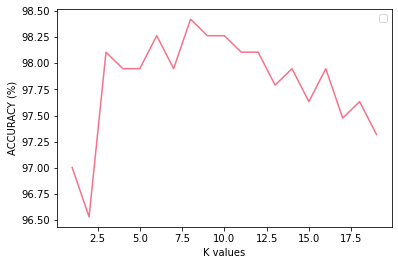

In [47]:
import matplotlib.pyplot as plt
plt.plot(range(1,20), score)
plt.xlabel("K values")
plt.ylabel("ACCURACY (%)")
plt.legend()
plt.show()

In [48]:
print("Accuracy of gender recognition from voice data by Knn learning is %{}".format(round(max_score,3)))

Accuracy of gender recognition from voice data by Knn learning is %98.423


In [49]:
pred=knn.predict(x_test)

In [50]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)

In [52]:
from math import sqrt
rmse = sqrt(mse)

In [53]:
rmse

0.16374944313243622

In [54]:
value_rmse=1-rmse
print(value_rmse)

0.8362505568675638


Correlation Value of Q25 and MeanFreq is : 1.0


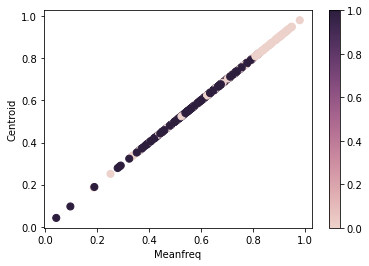

In [56]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test['meanfreq'], x_test['centroid'], c=pred, s=50, cmap=cmap)
plt.xlabel("Meanfreq")
plt.ylabel("Centroid")
print("Correlation Value of Q25 and MeanFreq is :",x_test['meanfreq'].corr(x_test['centroid']))
f.colorbar(points)
plt.show()

Correlation Value of Median and MeanFreq is : 0.9254108753463293


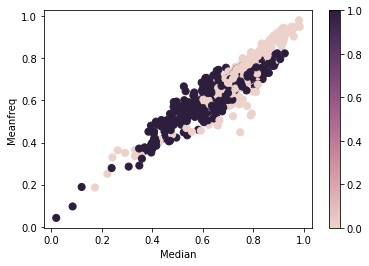

In [57]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test['median'], x_test['meanfreq'], c=pred, s=50, cmap=cmap)
plt.xlabel("Median")
plt.ylabel("Meanfreq")
print("Correlation Value of Median and MeanFreq is :",x_test['median'].corr(x_test['meanfreq']))
f.colorbar(points)
plt.show()

Correlation Value of Q25 and MeanFreq is : 0.9112042459132494


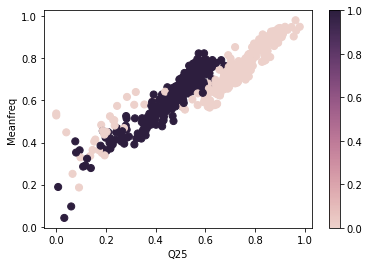

In [58]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test['Q25'], x_test['meanfreq'], c=pred, s=50, cmap=cmap)
plt.xlabel("Q25")
plt.ylabel("Meanfreq")
print("Correlation Value of Q25 and MeanFreq is :",x_test['Q25'].corr(x_test['meanfreq']))
f.colorbar(points)
plt.show()

Correlation Value of Kurt and Skew is : 0.9782738309541651


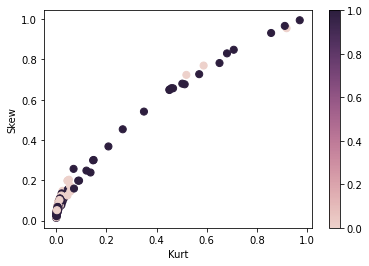

In [59]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test['kurt'], x_test['skew'], c=pred, s=50, cmap=cmap)
plt.xlabel("Kurt")
plt.ylabel("Skew")
print("Correlation Value of Kurt and Skew is :",x_test['kurt'].corr(x_test['skew']))
f.colorbar(points)
plt.show()

Correlation Value of Centorid and Median is : 0.9254108753463294


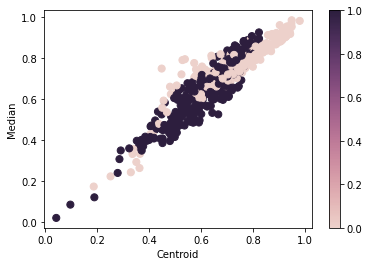

In [60]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test['centroid'], x_test['median'], c=pred, s=50, cmap=cmap)
plt.xlabel("Centroid")
plt.ylabel("Median")
print("Correlation Value of Centorid and Median is :",x_test['centroid'].corr(x_test['median']))
f.colorbar(points)
plt.show()

Correlation Value of Median and MeanFreq is : 0.9254108753463294


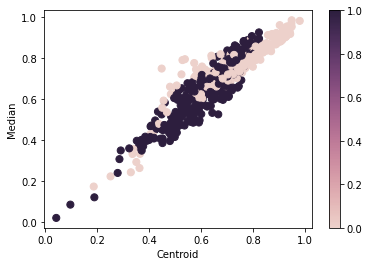

In [61]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(x_test['centroid'], x_test['median'], c=pred, s=50, cmap=cmap)
plt.xlabel("Centroid")
plt.ylabel("Median")
print("Correlation Value of Median and MeanFreq is :",x_test['centroid'].corr(x_test['median']))
f.colorbar(points)
plt.show()

In [62]:
knn.score(x_test,y_test)

0.973186119873817

No handles with labels found to put in legend.


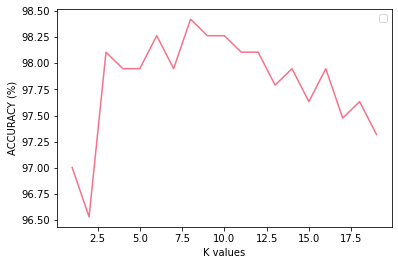

In [63]:
import matplotlib.pyplot as plt
plt.plot(range(1,20), score)
plt.xlabel("K values")
plt.ylabel("ACCURACY (%)")
plt.legend()
plt.show()

In [64]:
print("Accuracy of gender recognition from voice data by Knn learning is %{}".format(round(max_score,3)))

Accuracy of gender recognition from voice data by Knn learning is %98.423


In [65]:
y_pred=knn.predict(x_test)

In [66]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)


[[286  11]
 [  6 331]]


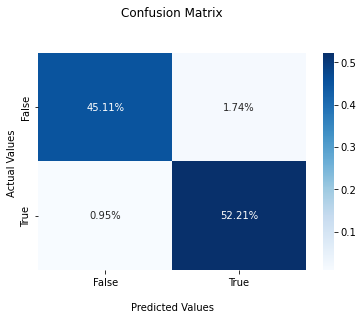

In [67]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [68]:
OutputDF = pd.DataFrame({'Actual_label':y_test,'Predicted_label':y_pred})


In [69]:
OutputDF

,Actual_label,Predicted_label
2148,0,0
1124,1,1
170,1,1
3158,0,0
2229,0,0
...,...,...
3007,0,1
912,1,1
533,1,1
857,1,1


## SVM 

In [73]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

rate=[]


In [87]:
def svm_kernel():
  kernel=['rbf','poly','linear']
  for i in kernel:
    SVM_Model = SVC(kernel=i).fit(x_train,y_train)
    y_pred = SVM_Model.predict(x_train)
    print(i, 'Accuracy of Train Data : ', accuracy_score(y_train,y_pred))
    y_pred = SVM_Model.predict(x_test)
    print(i, 'Accuracy of Test Data : ', accuracy_score(y_test,y_pred))
    rate.append(accuracy_score(y_test,y_pred))
  nloc = rate.index(max(rate))
  print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
  return kernel[nloc]
    

In [88]:
k=svm_kernel()

rbf Accuracy of Train Data :  0.9802683504340963
rbf Accuracy of Test Data :  0.9842271293375394
poly Accuracy of Train Data :  0.9826361483820047
poly Accuracy of Test Data :  0.9810725552050473
linear Accuracy of Train Data :  0.9743488555643252
linear Accuracy of Test Data :  0.9810725552050473
Highest accuracy is 0.9842271293375394 occurs at poly kernel.


In [89]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C = range(1,C)
    for i in C:
        model = SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='red', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
    plt.title('Error Rate Vs C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

Lowest error is 0.01892744479495268 occurs at C=1.


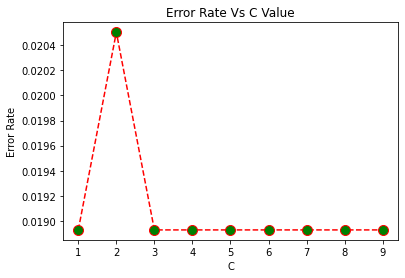

In [90]:
c = svm_error('poly', 10, x_train, y_train, x_test, y_test)

In [94]:
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

PCA_method = PCA(n_components=2)

In [96]:
# Fit And Transorm Data
traindf= PCA_method.fit_transform(x_train)
testdf = PCA_method.transform(x_test)

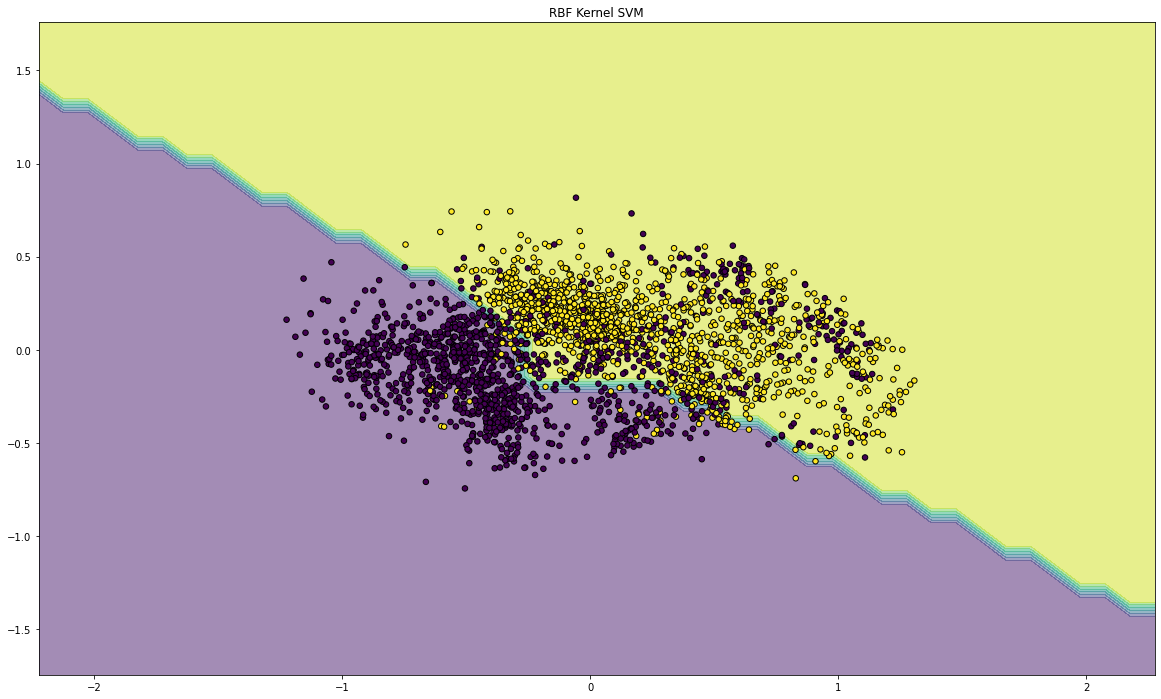

In [98]:
x_min, x_max = traindf[:, 0].min() - 1, traindf[:, 0].max() + 1
y_min, y_max = traindf[:, 1].min() - 1, traindf[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots(figsize=(20, 12))

SVM_Model = SVC(kernel=k, C=c).fit(traindf,y_train)

for clf, tt in zip([SVM_Model],['RBF Kernel SVM']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.5)
    ax.scatter(traindf[:, 0], traindf[:, 1], c=y_train, s=30, edgecolor='k')
    ax.set_title(tt)
plt.show()

In [99]:
Final_SVM_Model = SVC(kernel=k, C=c)
# Train the model using the training sets
Final_SVM_Model.fit(x_train, y_train)


SVC(C=1, kernel='poly')

In [100]:
Final_SVM_Model_train_predictions = Final_SVM_Model.predict(x_train)

In [101]:
Final_SVM_Model_test_predictions = Final_SVM_Model.predict(x_test)

In [103]:
print("SVM Model Confusion Matrix:")
print(confusion_matrix(y_train, Final_SVM_Model_train_predictions))

print("SVM Model Classification Report")
print(classification_report(y_train, Final_SVM_Model_train_predictions))

SVM Model Confusion Matrix:
[[1269   18]
 [  26 1221]]
SVM Model Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1287
           1       0.99      0.98      0.98      1247

    accuracy                           0.98      2534
   macro avg       0.98      0.98      0.98      2534
weighted avg       0.98      0.98      0.98      2534



In [110]:
print("SVM Model Confusion Matrix:")
print(confusion_matrix(y_test, Final_SVM_Model_test_predictions))
cfm=confusion_matrix(y_test, Final_SVM_Model_test_predictions)
print("SVM Model Classification Report")
print(classification_report(y_test, Final_SVM_Model_test_predictions))

SVM Model Confusion Matrix:
[[293   4]
 [  8 329]]
SVM Model Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       297
           1       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



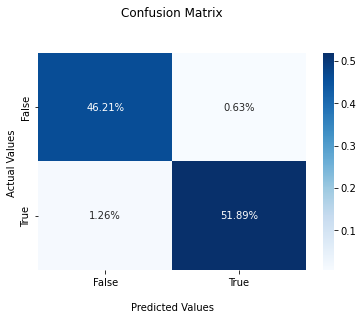

In [112]:
ax = sns.heatmap(cfm/np.sum(cfm), annot=True,fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [106]:
OutputDF = pd.DataFrame({'Actual_label':y_test,'Predicted_label':Final_SVM_Model_test_predictions})

In [108]:
OutputDF.head()

,Actual_label,Predicted_label
2148,0,0
1124,1,1
170,1,1
3158,0,0
2229,0,0
